# Compressor Analytics Dataset

Below are a few things to get you started with the Compressor Analytics dataset for AIHack! For more information see [here](https://drive.google.com/file/d/1ojYVHpabfkNz45nQqQLenyoaQbCmWdo4/view?usp=sharing).

In [0]:
# Download data - please only run this once
import urllib.request
import zipfile
import os

print("Starting download ...")
urls = [
    "https://github.com/aihack20/shell_challenge/releases/download/data/clean_dataset.zip",
    "https://github.com/aihack20/shell_challenge/releases/download/data/raw_dataset.zip",
]
os.makedirs("shell_data", exist_ok=True)
for url in urls:
    with urllib.request.urlopen(url) as src:
        with open("tmp.zip", "wb") as dest:
            dest.write(src.read())
    print("Unpacking archive ...")
    with zipfile.ZipFile("tmp.zip") as f:
        f.extractall("shell_data")
print("Done!")

Starting download ...
Unpacking archive ...
Unpacking archive ...
Done!


In [0]:
# Run this ONLY IF YOU USE GOOGLE COLAB
google_drive_dir = 'shell_data'# YOUR DIRECTORY HERE

try:
    from google.colab import drive
    drive.mount("/content/drive")
    directory = "working_dir"
    if not os.path.exists(directory):
      os.symlink(os.path.join("drive", "My Drive", google_drive_dir), directory)
except ModuleNotFoundError as err:
    print("This only works on Google Colab. Skipping ...")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%pip install pandas matplotlib

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [0]:
# Load the data (will take a short while)
clean_data = pd.read_csv("shell_data/clean_dataset.csv")
raw_data = pd.read_csv("shell_data/raw_dataset.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,239,240,241,242,243,244,245,246,247,248,249,250,251,252,2

## Your Hack ...

In [0]:
np.shape(clean_data)
import pandas as pd
from scipy import stats
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
import numpy as np
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
clean_data = clean_data.ffill()

In [0]:
#ADFuller Test
def adfullertest(series, signif=0.05, name='', verbose=False): 
  """Perform ADFuller to test for Stationarity of given series and print report""" 
  r = adfuller(series, autolag='AIC') 
  output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]} 
  p_value = output['pvalue'] 
  def adjust(val, length= 6): return str(val).ljust(length) 
  # Print Summary 
  print(f' Augmented Dickey-Fuller Test on "{name}"' , "\n ", '-'*47) 
  print(f' Null Hypothesis: Data has unit root. Non-Stationary.') 
  print(f' Significance Level = {signif}') 
  print(f' Test Statistic = {output["test_statistic"]}') 
  print(f' No. Lags Chosen = {output["n_lags"]}') 
  for key,val in r[4].items():
    print(f' Critical value {adjust(key)} = {round(val, 3)}') 
  if p_value <= signif: 
    print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.") 
    print(f" => Series is Stationary.") 
  else: 
    print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.") 
    print(f" => Series is Non-Stationary.") 

# ADF Test on each column 
count = 0
for name, column in clean_data.items():
  if(count > 230):
    adfullertest(column, name=column.name) 
    print('\n')
    count += 1
  else:
    count += 1

 Augmented Dickey-Fuller Test on "Pressure Difference 231" 
  -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level = 0.05
 Test Statistic = -11.3536
 No. Lags Chosen = 69
 Critical value 1%     = -3.43
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "Pressure Difference 232" 
  -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level = 0.05
 Test Statistic = -13.883
 No. Lags Chosen = 63
 Critical value 1%     = -3.43
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "Pressure Difference 233" 
  -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level

In [0]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
del clean_data['original_index']
correlation_matrix = clean_data.corr(method ='pearson')

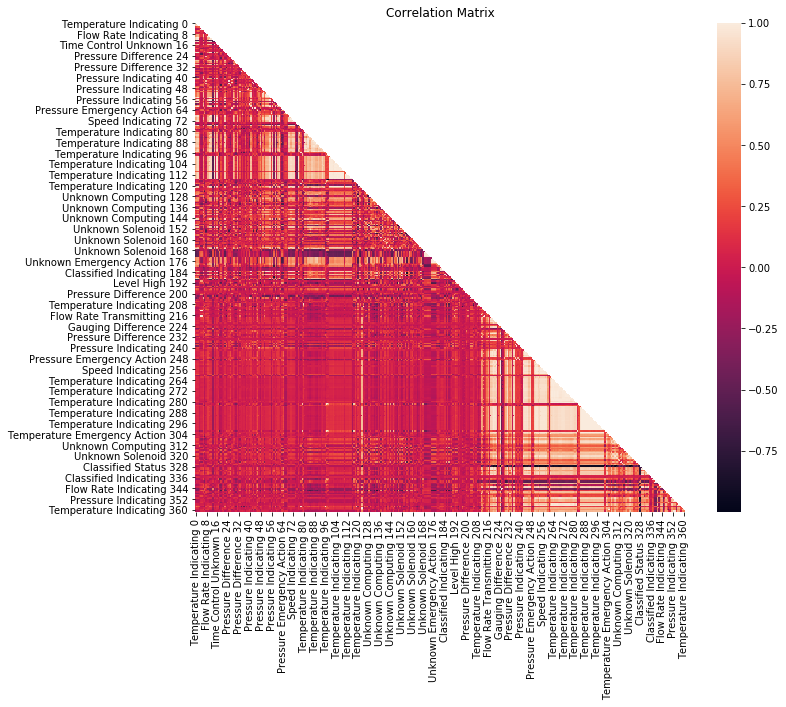

In [0]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

clean_data = pd.read_csv("shell_data/clean_dataset.csv")

del clean_data['original_index']
correlation_matrix = clean_data.corr(method ='pearson')

mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

plt.title('Correlation Matrix')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask)